In [2]:
#Implementation of Forward Propagation algorithm
#Use of activation function: capture non-linearities

import numpy as np
from sklearn.metrics import mean_squared_error

def pred(data, weights):
    
    node0_0_input = (data * weights['node0']).sum()
    node0_0_output = max(node0_0_input, 0)
    
    node0_1_input = (data * weights['node1']).sum()
    node0_1_output = max(node0_1_input, 0)
    
    hidden_0_out = np.array([node0_0_output, node0_1_output])

    model_output = (hidden_0_out * weights['output']).sum()
    
    return(model_output)

data = np.array([[2, 4], [3, -3], [0, 0], [6, 3]])
actual = np.array([2,3,5,6])

weights0 = {'node0': np.array([2, 4]),
           'node1': np.array([4, -6]),
           'output': np.array([1, 6])}

weights1 = {'node0': np.array([-2, 4]),
           'node1': np.array([3, -4]),
           'output': np.array([1, 6])}

results0 = []
results1 = []
for i in data:
    results0.append(pred(i, weights0))
    results1.append(pred(i, weights1))
    
mse0 = mean_squared_error(actual, results0)
mse1 = mean_squared_error(actual, results1)

print("MSE weights0: %f" %mse0)
print("MSE weights1: %f" %mse1)

MSE weights0: 8648.500000
MSE weights1: 4038.500000


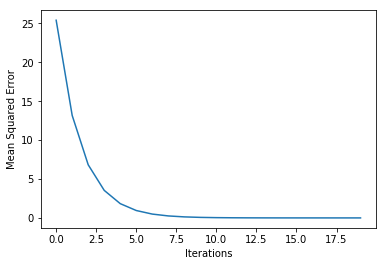

In [4]:
#calculate slope for a weight
#slope of loss function (weight into pred minus actual multiplied by value of neuron preceeding) * value of neuron/node
#value of neuron * weight
#slope of activation function * value

# gradient = 2 * data * error (need some calculus to get this...chain rule)

import matplotlib.pyplot as plt

#calculating error
def err(data, actual, weights):
    preds = (weights * data).sum()
    error = preds - actual
    return(error)

#calculating mean squared error
def fmse(data, actual, weights):
    errors = err(data, actual, weights)
    mse = np.mean(errors**2)
    return(mse)

#calculating slope
def slope(data, actual, weights):
    error = err(data, actual, weights)
    slope = 2 * data * error
    return(slope)

n_iter = 20
data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
actual = 0
mse_hist = []

# Iterate over the number of updates
for i in range(n_iter):
    # Calculate the slope: slope
    slp = slope(data, actual, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slp
    
    # Calculate mse with new weights: mse
    mse = fmse(data, actual, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

In [21]:
#Backpropagation process?
#ascertain slope of loss function for each weight
#perform forward propagation to calculate predictions and errors
#predictions using forward propagation, you update the weights using backward propagation.
#each iteration through training data is called epoch

In [5]:
# Import necessary modules
import keras
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential

data = pd.read_csv('data/hourly_wages.csv')

predictors = np.array(data.iloc[:,1:])
target = np.array(data.iloc[:,0])

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
# Set up the model
model = Sequential()

#first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

#second layer
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(1))

#compiling the model

#1. optimizer control the learning rate. example ADAM. Note: make sure to standardize feature values so ADAM can perfrom better
#2. Pick a loss model. MSE for regression. Keras for classification 

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

# Fit the model
model.fit(predictors,target,epochs=10)

Loss function: mean_squared_error
Epoch 1/10
534/534 [==============================] - 0s 858us/step - loss: 30.9904
Epoch 2/10
534/534 [==============================] - 0s 65us/step - loss: 24.5819
Epoch 3/10
534/534 [==============================] - 0s 54us/step - loss: 22.9761
Epoch 4/10
534/534 [==============================] - 0s 50us/step - loss: 21.6685
Epoch 5/10
534/534 [==============================] - 0s 59us/step - loss: 21.6620
Epoch 6/10
534/534 [==============================] - 0s 59us/step - loss: 21.5653
Epoch 7/10
534/534 [==============================] - 0s 58us/step - loss: 20.9927
Epoch 8/10
534/534 [==============================] - 0s 46us/step - loss: 21.2405
Epoch 9/10
534/534 [==============================] - 0s 59us/step - loss: 20.7598
Epoch 10/10
534/534 [==============================] - 0s 51us/step - loss: 20.7941


In [7]:
#now onto classification problems

from keras.utils import to_categorical

df = pd.read_csv('data/titanic_all_numeric.csv')

predictors = np.array(df.iloc[:,1:])

# Convert the target to categorical: target
target = to_categorical(df.survived)

n_cols = predictors.shape[1]

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2,activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model.fit(predictors, target, epochs=10)

Epoch 1/10
891/891 [==============================] - 0s 315us/step - loss: 2.2362 - acc: 0.5903
Epoch 2/10
891/891 [==============================] - 0s 55us/step - loss: 1.2361 - acc: 0.6038
Epoch 3/10
891/891 [==============================] - 0s 60us/step - loss: 0.7677 - acc: 0.6453
Epoch 4/10
891/891 [==============================] - 0s 58us/step - loss: 0.7566 - acc: 0.6521
Epoch 5/10
891/891 [==============================] - 0s 48us/step - loss: 0.6135 - acc: 0.6846
Epoch 6/10
891/891 [==============================] - 0s 53us/step - loss: 0.6145 - acc: 0.6869
Epoch 7/10
891/891 [==============================] - 0s 46us/step - loss: 0.6253 - acc: 0.6835
Epoch 8/10
891/891 [==============================] - 0s 52us/step - loss: 0.6031 - acc: 0.6981
Epoch 9/10
891/891 [==============================] - 0s 46us/step - loss: 0.5966 - acc: 0.6992
Epoch 10/10
891/891 [==============================] - 0s 52us/step - loss: 0.5928 - acc: 0.7015


In [8]:
#testdata

df1 = pd.read_csv('pred.csv')

pred = np.array(df1)

# Calculate predictions: predictions
predict = model.predict(pred)

# Calculate predicted probability of survival: predicted_prob_true
prob_surv = predict[:,1]

# print prob_surv
print(prob_surv)

[0.39712897 0.57074004 0.8044123  0.46715286 0.34581372 0.32716954
 0.15186645 0.45437607 0.35719857 0.7300025  0.36736855 0.5206442
 0.35075843 0.46251714 0.33493733 0.22186466 0.41501984 0.597984
 0.21039395 0.5051329  0.8578857  0.37130395 0.15782246 0.4484864
 0.44993567 0.2993445  0.7452693  0.5936936  0.3104829  0.8175021
 0.4551204  0.51039743 0.2777781  0.39087182 0.4392369  0.818946
 0.4200654  0.33568433 0.7445769  0.60536313 0.41655383 0.50320864
 0.6201732  0.22183698 0.45352864 0.24063247 0.5525246  0.2475786
 0.63305366 0.82228374 0.42495802 0.06677469 0.4798677  0.701175
 0.5088373  0.46765605 0.9399705  0.4891966  0.48390675 0.2777781
 0.27712417 0.44261807 0.52841973 0.5643645  0.48069978 0.35574993
 0.40059575 0.73707896 0.35724902 0.47915637 0.36749533 0.70375085
 0.27413297 0.22800134 0.52317    0.41676283 0.44750798 0.424376
 0.33342895 0.82232857 0.6040301  0.31407863 0.46531525 0.40671432
 0.36250135 0.52414304 0.45529467 0.6544924  0.5094857  0.6136362
 0.290622

In [15]:
#Optimization and parameter tuning
#dying-neuron: neuron takes less than zero value for all rows
#vanishing gradient problem: when layers have smaller slopes(sometimes closer to zero) as we move backward in the network. this causes the backprop update to be zero

from keras.optimizers import SGD

input_shape = (10,)

def model_iter(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

# Create list of learning rates: lr_to_test
lr_l = [0.000001, 0.01, 1]

# Loop over learning rates
for i in lr_l:
    print('\n\nTesting model with learning rate: %f\n'%i )
    
    # Build new model to test, unaffected by previous models
    model = model_iter()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=i)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors,target, epochs=10)



Testing model with learning rate: 0.000001

Epoch 1/10
891/891 [==============================] - 0s 559us/step - loss: 0.7566
Epoch 2/10
891/891 [==============================] - 0s 85us/step - loss: 0.7537
Epoch 3/10
891/891 [==============================] - 0s 79us/step - loss: 0.7508
Epoch 4/10
891/891 [==============================] - 0s 74us/step - loss: 0.7481
Epoch 5/10
891/891 [==============================] - 0s 80us/step - loss: 0.7455
Epoch 6/10
891/891 [==============================] - 0s 72us/step - loss: 0.7430
Epoch 7/10
891/891 [==============================] - 0s 60us/step - loss: 0.7405
Epoch 8/10
891/891 [==============================] - 0s 55us/step - loss: 0.7382
Epoch 9/10
891/891 [==============================] - 0s 76us/step - loss: 0.7359
Epoch 10/10
891/891 [==============================] - 0s 62us/step - loss: 0.7338


Testing model with learning rate: 0.010000

Epoch 1/10
891/891 [==============================] - 1s 615us/step - loss: 2.1057
Epo

In [18]:
#validation dataset

n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors,target,validation_split=0.3,epochs=10)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 1s 2ms/step - loss: 1.1085 - acc: 0.6100 - val_loss: 0.9308 - val_acc: 0.4366
Epoch 2/10
623/623 [==============================] - 0s 123us/step - loss: 0.6835 - acc: 0.6485 - val_loss: 0.7239 - val_acc: 0.6455
Epoch 3/10
623/623 [==============================] - 0s 133us/step - loss: 0.7097 - acc: 0.6067 - val_loss: 0.5358 - val_acc: 0.7575
Epoch 4/10
623/623 [==============================] - 0s 132us/step - loss: 0.6533 - acc: 0.6726 - val_loss: 0.5436 - val_acc: 0.7687
Epoch 5/10
623/623 [==============================] - 0s 130us/step - loss: 0.6762 - acc: 0.6549 - val_loss: 0.5498 - val_acc: 0.7276
Epoch 6/10
623/623 [==============================] - 0s 130us/step - loss: 0.6154 - acc: 0.6870 - val_loss: 0.5008 - val_acc: 0.7537
Epoch 7/10
623/623 [==============================] - ETA: 0s - loss: 0.5798 - acc: 0.687 - 0s 141us/step - loss: 0.5723 - acc: 0.6982 - val_loss: 0.511

In [20]:
#what to do when good'ol optimization fails to improve performance

# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors,target,validation_split=0.3,epochs=30,callbacks=[early_stopping_monitor])

#stopped after 9 epochs because the performance wasn't improving

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 2s 2ms/step - loss: 1.0414 - acc: 0.5923 - val_loss: 0.6072 - val_acc: 0.7015
Epoch 2/30
623/623 [==============================] - 0s 136us/step - loss: 0.7481 - acc: 0.6292 - val_loss: 0.5613 - val_acc: 0.7164
Epoch 3/30
623/623 [==============================] - 0s 150us/step - loss: 0.7044 - acc: 0.6822 - val_loss: 0.6691 - val_acc: 0.6828
Epoch 4/30
623/623 [==============================] - 0s 151us/step - loss: 0.6481 - acc: 0.6838 - val_loss: 0.5336 - val_acc: 0.7313
Epoch 5/30
623/623 [==============================] - 0s 165us/step - loss: 0.7796 - acc: 0.6629 - val_loss: 0.9651 - val_acc: 0.6530
Epoch 6/30
623/623 [==============================] - 0s 163us/step - loss: 0.6273 - acc: 0.6838 - val_loss: 0.5277 - val_acc: 0.7612
Epoch 7/30
623/623 [==============================] - 0s 149us/step - loss: 0.6001 - acc: 0.6870 - val_loss: 0.4968 - val_acc: 0.7649
Epoch 8/30
623/623

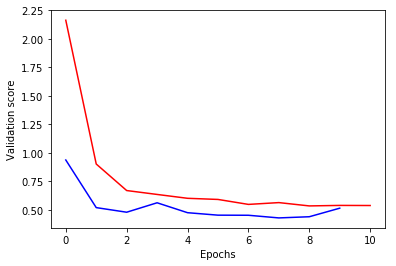

In [32]:
#comparing two different models

#model1 with 10 units
model1 = Sequential()
model1.add(Dense(10, activation='relu', input_shape = input_shape))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(2, activation='softmax'))

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

#model2 with 100 units
model2 = Sequential()
model2.add(Dense(100, activation='relu', input_shape=input_shape))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(2, activation='softmax'))

# Compile the models
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model_1
model1_training = model1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model2_training = model2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model1_training.history['val_loss'], 'r', model2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [ ]:
#how to decide the architecture of the network
# start simple, monitor the validation score, keep adding layer until the progress gets stagnant
